# CREDIT CARD FRAUD DETECTION 
'''Credit card fraud detection describes the different ways financial institutions help prevent, identify and manage credit card fraud.

Credit card fraud detection methods are typically digital and automatic. Some financial institutions use AI and machine learning to analyze typical customer behavior—such as their spending habits and credit usage—and flag any unusual account activity.

Credit card companies and other financial institutions may also use AI to alert cardholders to irregularities in their accounts. '''

# Import the necessary packages

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Import the dataset

In [22]:
df=pd.read_csv(r"C:\Users\jeevi\Downloads\fraudTrain.csv\fraudTrain.csv")

In [23]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# shape of the dataset

In [24]:
df.shape

(1296675, 23)

## Columns in the dataset

In [25]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

## Information about the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cc_num     1296675 non-null  int64  
 1   gender     1296675 non-null  int32  
 2   zip        1296675 non-null  int64  
 3   lat        1296675 non-null  float64
 4   long       1296675 non-null  float64
 5   city_pop   1296675 non-null  int64  
 6   merch_lat  1296675 non-null  float64
 7   is_fraud   1296675 non-null  int64  
 8   age        1296675 non-null  float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 84.1 MB


## Check for null values

In [27]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## statistical measures of the dataset

In [28]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## calulate the age from dob

In [29]:
#calculate the age from dob
df['dob']= pd.to_datetime(df['dob'])
now=pd.to_datetime('now')
df['age']=(now-df['dob']).astype('<m8[Y]')

C:\Users\jeevi\AppData\Local\Temp\ipykernel_14276\959646589.py:3: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now=pd.to_datetime('now')


In [30]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37.0


## convert the categorical data to numerical data

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [32]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,35.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,45.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,61.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,56.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,1,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,37.0


In [33]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'age'],
      dtype='object')

##### we can see that men have the high frauded credit cards

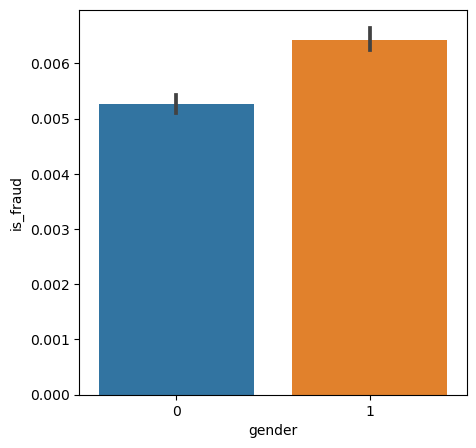

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(data=df,x='gender',y='is_fraud')
plt.show()

<Axes: >

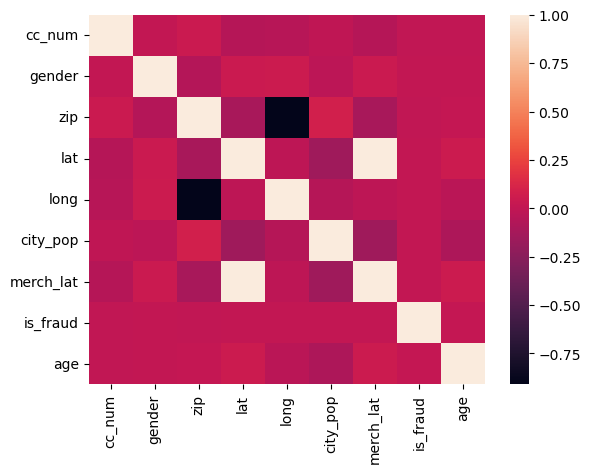

In [63]:
sns.heatmap(df.corr())

### Check for unique values in fraud 

In [40]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

## Drop the unnecessary columns

In [44]:
df=df.drop(['Unnamed: 0','trans_date_trans_time','street','dob', 
             'trans_num', 'merch_long','unix_time', 'first', 'last',
            'merchant', 'category','amt','job','city','state',],axis=1)


In [45]:
df.head()

,cc_num,gender,zip,lat,long,city_pop,merch_lat,is_fraud,age
0,2703186189652095,0,28654,36.0788,-81.1781,3495,36.011293,0,35.0
1,630423337322,0,99160,48.8878,-118.2105,149,49.159047,0,45.0
2,38859492057661,1,83252,42.1808,-112.2620,4154,43.150704,0,61.0
3,3534093764340240,1,59632,46.2306,-112.1138,1939,47.034331,0,56.0
4,375534208663984,1,24433,38.4207,-79.4629,99,38.674999,0,37.0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   cc_num     1296675 non-null  int64  
 1   gender     1296675 non-null  int32  
 2   zip        1296675 non-null  int64  
 3   lat        1296675 non-null  float64
 4   long       1296675 non-null  float64
 5   city_pop   1296675 non-null  int64  
 6   merch_lat  1296675 non-null  float64
 7   is_fraud   1296675 non-null  int64  
 8   age        1296675 non-null  float64
dtypes: float64(4), int32(1), int64(4)
memory usage: 84.1 MB


In [49]:
df.columns

Index(['cc_num', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat',
       'is_fraud', 'age'],
      dtype='object')

## Assign x and y from the data

In [52]:
x=df[['cc_num', 'gender', 'zip', 'lat', 'long', 'city_pop', 'merch_lat','age']]
y=df['is_fraud']

## split the train and test data

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [54]:
x_train

,cc_num,gender,zip,lat,long,city_pop,merch_lat,age
922314,4259996134423,0,67545,38.1485,-98.6408,215,38.854669,54.0
57027,372509258176510,0,48438,42.9147,-83.4845,6951,42.552373,38.0
229075,60422928733,1,29860,33.6028,-81.9748,46944,32.831101,81.0
1013507,213178850083780,1,97813,45.8289,-118.4971,1302,46.777540,46.0
414373,343819048608995,0,50312,41.5855,-93.6719,222785,42.319574,67.0
...,...,...,...,...,...,...,...,...
76394,3549202406645667,1,4074,43.5835,-70.3457,18760,43.731848,90.0
472809,4477156602511939689,0,84003,40.3928,-111.7941,42384,40.127194,30.0
656530,6596735789587928,1,55388,44.9595,-93.8482,5619,44.813149,64.0
698898,30442439074871,0,18433,41.5744,-75.5881,6508,41.201050,42.0


In [55]:
y_train

922314     0
57027      0
229075     0
1013507    0
414373     0
          ..
76394      0
472809     0
656530     0
698898     0
653335     0
Name: is_fraud, Length: 972506, dtype: int64

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(972506, 8)
(972506,)
(324169, 8)
(324169,)


# Logistic regression model

In [57]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predict=lr.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    322252
           1       0.00      0.00      0.00      1917

    accuracy                           0.99    324169
   macro avg       0.50      0.50      0.50    324169
weighted avg       0.99      0.99      0.99    324169



C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## we got 99% accuary from the logistic model

# Random Forest Classifier

In [60]:
#random forest classifier
rf=RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [61]:
predict=rf.predict(x_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    322252
           1       0.11      0.10      0.10      1917

    accuracy                           0.99    324169
   macro avg       0.55      0.55      0.55    324169
weighted avg       0.99      0.99      0.99    324169



## Got 99% accuracy for random forest classifier

# Support vector Classifier

In [62]:
svc=SVC()
svc.fit(x_train,y_train)
predict=svc.predict(x_test)
print(classification_report(y_test,predict))

C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    322252
           1       0.00      0.00      0.00      1917

    accuracy                           0.99    324169
   macro avg       0.50      0.50      0.50    324169
weighted avg       0.99      0.99      0.99    324169



C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jeevi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## got same 99% accuracy for svm model